### Mid-Point Analysis

2023 marks the mid-way point of the roadmap to 2030 for the Sustainable Development Goals. The analysis of the progress on the SDGs are usually summaried by the [Progress Chart](https://unstats.un.org/sdgs/report/2022/progress-chart). This analysis seeks to be more transparent about the methodology and showcase the projection that is computed based on the methodlogy outlined in the [technical note](https://unstats.un.org/sdgs/report/2022/Progress_Chart_Technical_Note_2022.pdf). This also highlights the limitation of the progress chart, recognising the asssumptions that it makes in producing the estimation for 2030 estimation.

In [1]:
import pandas as pd 
import requests
import matplotlib.pyplot as plt 
import numpy as np 

from int_func import SDG_col, series_list,unsd_list, return_datapoints, return_seriesCode,progress_CARG_a,progress_cr,progress_data, plot_trend_and_required

In [2]:
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.left'] = True
plt.rcParams['xtick.major.size'] = 0
plt.rcParams['axes.grid'] = False

Unless otherwise specified, historical data is taken directly from the SDG Global Database. By studying the progress chart technical note, the target value (which sometimes is a range) is obtained.

The projected value is calculated using the $CAGR$:
$$CARG = \left( \frac{x_t}{x_0}\right)^{1/\Delta t} -1$$
The projected value is then caculated:
$$x_{2030} = x_0 \times (1+CARG)^{(2030 -t_0)}

#### SDG 1 No Poverty

**1.1.1** Eradicate extreme poverty for all people everywhere \
"The latest data used for both trend and level assessments are 2021 nowcasts with high uncertainty". \
The analysis below used latest figure from 2019.
The precision of the Global Database data and the submission from [agencies WB](https://unitednations-my.sharepoint.com/:x:/r/personal/min3_un_org/Documents/Y_SDG%20shared/SDG%20Reports/2022/1.%20Original%20submission%20and%20files%20from%20agencies/Goal%201/1.1.1_WB-DESKTOP-U5SQL87.xlsx?d=w49c507ea74314efba20388f281221e27&csf=1&web=1&e=wB3yui) are different.

In [3]:
df_010101 = return_datapoints("SI_POV_DAY1",start_year = 2015, plot = False)

More than one disaggregative dimension available: ['Age' 'Location' 'Sex']
The year available: [2015 2016 2017 2018 2019]
 There exists 5 data points for SI_POV_DAY1.
                 value     Age Location  Sex Reporting Type
timePeriodStart                                            
2015              11.0  ALLAGE  ALLAREA  All              G
2016              11.0  ALLAGE  ALLAREA  All              G
2017              10.0  ALLAGE  ALLAREA  All              G
2018               9.0  ALLAGE  ALLAREA  All              G
2019               8.0  ALLAGE  ALLAREA  All              G


In [4]:
df_010101['value'] = [10.1,9.6,9.1,8.6,8.3]

The latest year of data available: 2019


(2.0, 12.0)

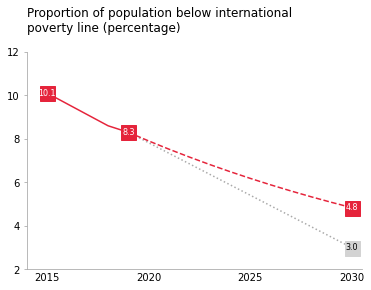

In [6]:
ax = plot_trend_and_required(df = df_010101,sdg = 1,target_value=3.0  ,mul_digit = False)
ax.yaxis.set_major_locator(plt.MultipleLocator(2))
ax.set_title("Proportion of population below international \npoverty line (percentage)", loc = 'left', pad = 20)
ax.set_ylim(2,12)

**1.3.1** Achieve substantial social protection coverage
No numerical target is specified for this indicator

In [7]:
df_010301 = return_datapoints("SI_COV_BENFTS",plot = False)

The year available: [2016 2020]
 There exists 2 data points for SI_COV_BENFTS.
Sex               All
timePeriodStart      
2016             45.2
2020             46.9


The latest year of data available: 2020


Text(0.0, 1.0, 'Proportion of population covered by at least on social \nprotection benefit, by sex (percentage)')

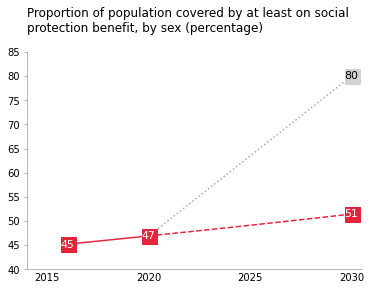

In [8]:
ax= plot_trend_and_required(df = df_010301, base_year= 2016, target_value = 80,sdg = 1, column_name = 'All')
ax.set_ylim(40,85)
ax.set_title("Proportion of population covered by at least on social \nprotection benefit, by sex (percentage)", loc = 'left', pad = 20)


#### SDG 2 Zero Hunger

**2.1.2** Prevalence of moderate or severe food insecurity in the population, based on Food Insecurity Experience Scale (FIES)

In [5]:
df_020102 = return_datapoints("AG_PRD_FIESMS", disagg= False, plot =False)

The year available: [2014 2015 2016 2017 2018 2019 2020 2021]
 There exists 8 data points for AG_PRD_FIESMS.
                 value     Age  Sex Reporting Type
timePeriodStart                                   
2014              21.2  ALLAGE  All              G
2015              21.5  ALLAGE  All              G
2016              22.7  ALLAGE  All              G
2017              23.9  ALLAGE  All              G
2018              25.0  ALLAGE  All              G


The latest year of data available: 2021


Text(0.0, 1.0, 'Prevalence of moderate or severe food insecurity in \nthe adult population (percentage)')

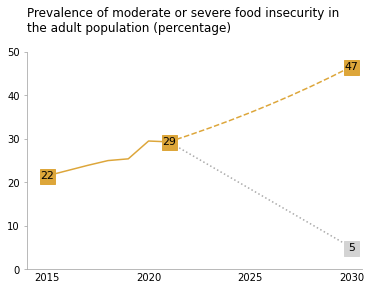

In [6]:
ax = plot_trend_and_required(df = df_020102, base_year = 2015,target_value = 5 ,sdg =2)
ax.set_ylim(0,50)
ax.set_title('Prevalence of moderate or severe food insecurity in \nthe adult population (percentage)', loc = 'left', pad = 20)

**2.2.1** Prevalence of stunting

According to the [WHO documentation](https://apps.who.int/iris/bitstream/handle/10665/258938/WHO-NMH-NHD-17.9-eng.pdf;jsessionid=F5EE7F749AE8EC848BE91C8D9755F10E?sequence=1), using 2012 as the baseline year and by 2025 achieve a 40% reduction, the required AARR rate is computed. The plot shows the data point from 2015

In [3]:
df_020201 = return_datapoints("SH_STA_STNT", plot = False)
required_aarr = np.exp(1) **(np.log(0.6)/13)-1

The year available: [2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
 There exists 11 data points for SH_STA_STNT.
Age               <5Y
timePeriodStart      
2010             27.7
2011             26.9
2012             26.2
2013             25.5
2014             24.9


The latest year of data available: 2020


Text(0.0, 1.0, 'Proportion of children moderately or severely stunted \n(percentage)')

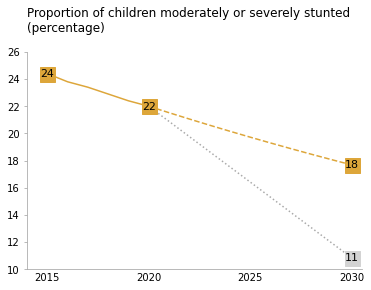

In [4]:
ax = plot_trend_and_required(df_020201,base_year = 2012,end_year = 2030,sdg = 2,carg_r = required_aarr,column_name='<5Y')
ax.set_ylim(10,26)

ax.set_title('Proportion of children moderately or severely stunted \n(percentage)', loc = 'left', pad = 20)

#### SDG 3 Good Health and Well-Being

**3.1.2** Proportion of births atteneded by skilled health personnel

In [14]:
df_030102 = return_datapoints('SH_STA_BRTC' ,plot = False)

More than one disaggregative dimension available: []
The year available: [2011 2021]
 There exists 2 data points for SH_STA_BRTC.
                    value Reporting Type
timePeriodStart                         
2011             76.85271              G
2021             83.56604              G


The latest year of data available: 2021
Data point for 2015 is estimated by interpolation: 79.538042


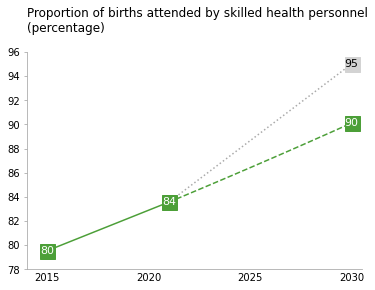

In [15]:
ax = plot_trend_and_required(df = df_030102,base_year = 2011, target_value = 95, sdg = 3)
ax.set_title('Proportion of births attended by skilled health personnel\n(percentage)', loc = 'left',pad= 20)
ax.set_ylim(78,96)

**3.2.1** Under-five mortality rate
Review the methodology

In [16]:
df_030201 = return_datapoints('SH_DYN_MORT', disagg = False, plot= False)

The year available: [2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
 There exists 11 data points for SH_DYN_MORT.
                 value  Age  Sex Reporting Type
timePeriodStart                                
2010              51.2  <5Y  All              G
2011              49.0  <5Y  All              G
2012              47.2  <5Y  All              G
2013              45.5  <5Y  All              G
2014              44.0  <5Y  All              G


The latest year of data available: 2020


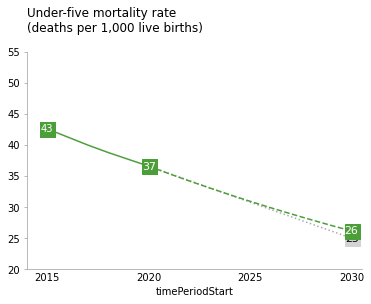

In [17]:
ax = plot_trend_and_required(df = df_030201, base_year = 2010, target_value = 25, sdg = 3)

# 2015 datapoint
val_2015 = df_030201.loc[2015,'value']
ax.plot(2015,val_2015,markersize = 15, marker = 's', color = SDG_col[3],zorder =3)
ax.annotate("{:.0f}".format(val_2015),(2015,val_2015),horizontalalignment = 'center',verticalalignment = 'center', color = '#FFFFFF')
df_030201.loc[2014:2015].plot(ax=ax, color = '#FFFFFF', legend = False, linewidth = 3)

ax.set_ylim(20,55)
ax.set_title('Under-five mortality rate \n(deaths per 1,000 live births)', loc = 'left',pad= 20)

**3.3.3** Malaria Incidence per 1,000 Population

In [18]:
df_030303 = return_datapoints('SH_STA_MALR', plot = False)

More than one disaggregative dimension available: []
The year available: [2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
 There exists 11 data points for SH_STA_MALR.
                    value Reporting Type
timePeriodStart                         
2010             69.31353              G
2011             66.28477              G
2012             64.27115              G
2013             61.70994              G
2014             59.82808              G


The latest year of data available: 2020


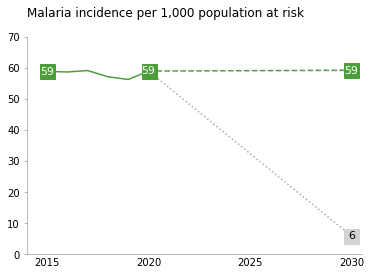

In [19]:
ax = plot_trend_and_required(sdg= 3, df = df_030303, target_value= df_030303['value'][2015]*0.1)
ax.set_ylim(0,70)
ax.set_title('Malaria incidence per 1,000 population at risk', loc = 'left',pad = 20)

**3.b.1** Propotion of the 1-year-oldcovered by DTP Vaccine Included in their National Progress

<span style="color:red">Need to review</span>

The target value in the technical note it not valid.

In [20]:
df_030b01 = return_datapoints('SH_ACS_DTP3',plot = False)

More than one disaggregative dimension available: []
The year available: [2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
 There exists 11 data points for SH_ACS_DTP3.
                 value Reporting Type
timePeriodStart                      
2010              84.0              G
2011              85.0              G
2012              85.0              G
2013              84.0              G
2014              84.0              G


The latest year of data available: 2020


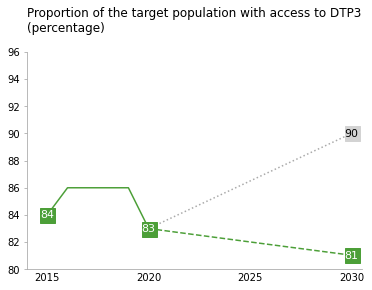

In [21]:
ax = plot_trend_and_required(df_030b01, target_value= 90, sdg = 3)
ax.set_ylim(80,96)
ax.set_title('Proportion of the target population with access to DTP3 \n(percentage)', loc = 'left',pad = 20)

#### SDG 4 Quality Education

**4.1.2** Primary Education Completion Rate

In [22]:
df_040102 = return_datapoints('SE_TOT_CPLR', disagg = True, plot = False)
df_040102 = df_040102[(df_040102['Education level'] == 'PRIMAR') & (df_040102['Sex'] == 'All')]

More than one disaggregative dimension available: ['Location' 'Sex' 'Education level' 'Quantile']
The year available: [2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
 There exists 99 data points for SE_TOT_CPLR.
                 value Location     Sex Education level Reporting Type  \
timePeriodStart                                                          
2010              70.9  ALLAREA  Female          LOWSEC              G   
2010              71.1  ALLAREA     All          LOWSEC              G   
2010              82.8  ALLAREA  Female          PRIMAR              G   
2010              71.6  ALLAREA    Male          LOWSEC              G   
2010              83.1  ALLAREA     All          PRIMAR              G   

                Quantile  
timePeriodStart           
2010                  _T  
2010                  _T  
2010                  _T  
2010                  _T  
2010                  _T  


The latest year of data available: 2020


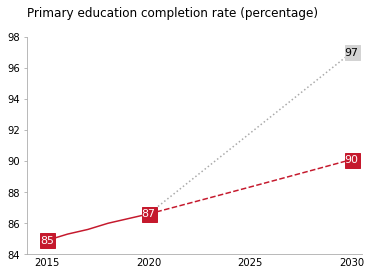

In [23]:
ax = plot_trend_and_required(df_040102, target_value = 97, sdg =4)
ax.set_title('Primary education completion rate (percentage)', loc ='left', pad = 20)
ax.set_ylim(84,98)

#### SDG 5 Gender Equality

**5.3.1** Proportion of women aghed 20-24 years who were Married or in a Union Before Age 18 \
<span style="color:red">Need to review</span>

Note that: 
$$AARR = ln(\frac{p_0}{p_1})/t$$
where $AARR$ is the annual rate of reduction such that:
$$p_0e^{-rt}= p_1$$

In [24]:
df_050301 = return_datapoints('SP_DYN_MRBF18', plot = False)

More than one disaggregative dimension available: ['Age' 'Sex']
The year available: [2011 2016 2021]
 There exists 3 data points for SP_DYN_MRBF18.
                 value    Age     Sex Reporting Type
timePeriodStart                                     
2011             22.80  20-24  Female              G
2016             21.40  20-24  Female              G
2021             19.47  20-24  Female              G


$$1+ CARG_a = e^{-r}$$

In [25]:
carg_a =  np.exp(np.log(df_050301['value'][2021]/df_050301['value'][2011])/10 ) - 1
carg_r = np.exp(np.log(10/ df_050301['value'][2011])/19) - 1


Data point for 2015 is estimated by interpolation: 21.68


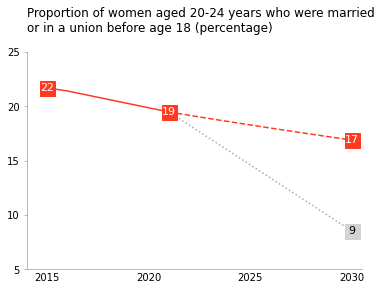

In [26]:
ax = plot_trend_and_required(df_050301, base_year =  2011, carg_a= carg_a,carg_r = carg_r , sdg = 5)
ax.set_ylim(5,25)
ax.set_title('Proportion of women aged 20-24 years who were married \nor in a union before age 18 (percentage)', loc = 'left', pad = 20)
ax.yaxis.set_major_locator(plt.MultipleLocator(5))

**5.5.1(a)** Proportion of Seats Held by Women in National Parliaments

In [27]:
df_050501 = return_datapoints('SG_GEN_PARL',plot = False)

The year available: [2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022]
 There exists 13 data points for SG_GEN_PARL.
Sex              Female
timePeriodStart        
2010              19.03
2011              19.34
2012              19.60
2013              20.76
2014              22.06


The latest year of data available: 2022


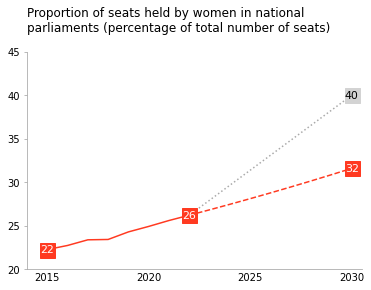

In [28]:
ax =plot_trend_and_required(df_050501, target_value = 40, sdg = 5, column_name = 'Female')
ax.set_title('Proportion of seats held by women in national \nparliaments (percentage of total number of seats)', loc = 'left', pad = 20)
ax.set_ylim(20,45)

#### SDG 6 Clean Water and Sanitation

**6.1.1.** Proportion of Population Using Safely Managed Drinking Water Services

In [29]:
df_060101 = return_datapoints('SH_H2O_SAFE', disagg= False, plot = False)

The year available: [2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
 There exists 11 data points for SH_H2O_SAFE.
                 value Location Reporting Type
timePeriodStart                               
2010              66.0  ALLAREA              G
2011              67.0  ALLAREA              G
2012              67.0  ALLAREA              G
2013              68.0  ALLAREA              G
2014              69.0  ALLAREA              G


The latest year of data available: 2020


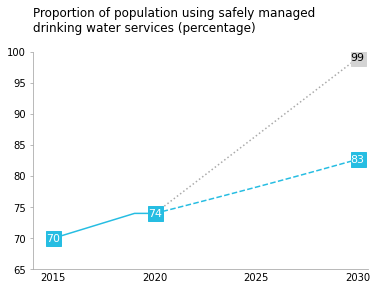

In [30]:
ax= plot_trend_and_required(df_060101, target_value = 99,sdg =6 )
ax.set_ylim(65,100)
ax.set_title('Proportion of population using safely managed \ndrinking water services (percentage)', loc = 'left', pad = 20)

**6.2.1 (a)** Proportion of Population Using Safely Managed Sanitation Services

In [31]:
df_060201 = return_datapoints('SH_SAN_SAFE', disagg = False, plot = False)

The year available: [2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
 There exists 11 data points for SH_SAN_SAFE.
                 value Location Reporting Type
timePeriodStart                               
2010              40.0  ALLAREA              G
2011              41.0  ALLAREA              G
2012              43.0  ALLAREA              G
2013              44.0  ALLAREA              G
2014              46.0  ALLAREA              G


The latest year of data available: 2020


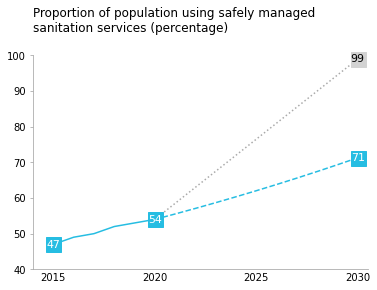

In [32]:
ax = plot_trend_and_required(df_060201, target_value = 99 ,sdg = 6)
ax.set_ylim(40,101)
ax.spines.left.set_bounds(40,100)
ax.set_title('Proportion of population using safely managed \nsanitation services (percentage)', loc = 'left', pad =20)

#### SDG 7 Clean and Affortable Energy

**7.1.1** Proportion of Popultion with Access to Electricity

In [33]:
df_070101 = return_datapoints('EG_ACS_ELEC', disagg = False, plot = False)

The year available: [2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
 There exists 11 data points for EG_ACS_ELEC.
                    value Location Reporting Type
timePeriodStart                                  
2010             83.21861  ALLAREA              G
2011             82.16443  ALLAREA              G
2012             84.73199  ALLAREA              G
2013             85.22697  ALLAREA              G
2014             85.63176  ALLAREA              G


The latest year of data available: 2020


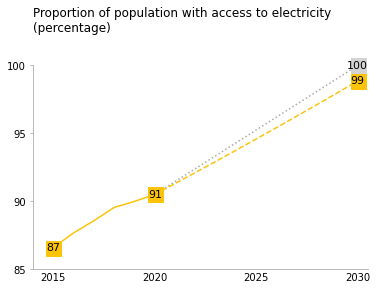

In [34]:
ax = plot_trend_and_required(df_070101, target_value = 100, sdg = 7)
ax.set_ylim(85,101)
ax.spines.left.set_bounds((85, 100))
ax.set_title('Proportion of population with access to electricity \n(percentage)', loc = 'left', pad = 20)
ax.yaxis.set_major_locator(plt.MultipleLocator(5))
ax.yaxis.set_offset_position('right')

**7.3.1** Energy Intensity Measure in Terms of Primary Energy and GDP

In [35]:
df_070301 = return_datapoints('EG_EGY_PRIM', plot = False)

More than one disaggregative dimension available: []
The year available: [2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]
 There exists 10 data points for EG_EGY_PRIM.
                 value Reporting Type
timePeriodStart                      
2010              5.57              G
2011              5.45              G
2012              5.35              G
2013              5.25              G
2014              5.15              G


The latest year of data available: 2019


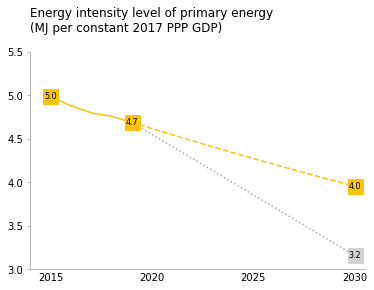

In [36]:
ax = plot_trend_and_required(df_070301, carg_r = -0.026, sdg = 7,mul_digit = False)
ax.set_title('Energy intensity level of primary energy \n(MJ per constant 2017 PPP GDP)', loc = 'left', pad = 20)
ax.set_ylim(3, 5.5)

#### SDG 8 Decent Work and Economic Growth

**8.1.1** Annual Growth Rate of Real GDP per Capita

In [37]:
df_080101 = return_datapoints('NY_GDP_PCAP', plot = False)

More than one disaggregative dimension available: []
The year available: [2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
 There exists 11 data points for NY_GDP_PCAP.
                 value Reporting Type
timePeriodStart                      
2010              3.25              G
2011              2.13              G
2012              1.51              G
2013              1.61              G
2014              1.82              G


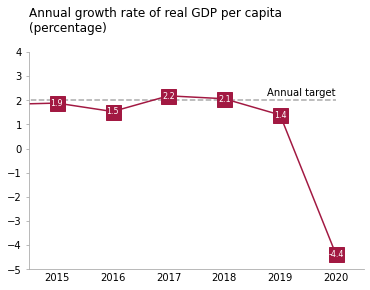

In [38]:
ax = df_080101.plot(color = SDG_col[8], legend = False, marker = 's',markersize = 15)

# target line at 2% per year
ax.plot([x for x in range(2010, 2021)], [2 for x in range(2010,2021)], linestyle = '--', color = 'darkgrey', zorder = 1)
# data observation line
ax.annotate("Annual target",(2020,2.1),horizontalalignment = 'right',verticalalignment = 'bottom')
for key, value in df_080101.iterrows():
    ax.annotate("{:.1f}".format(value['value']), (key,value['value']), horizontalalignment = 'center',verticalalignment = 'center', color = '#FFFFFF', fontsize = 8)

ax.set_title('Annual growth rate of real GDP per capita \n(percentage)',loc ='left',pad = 20)
ax.set_ylim(-5,4)
ax.set_xlim(2014.5,2020.5)
ax.set_xlabel("")
#ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_color('darkgrey')
ax.spines['bottom'].set_color('darkgrey')
ax.tick_params(axis='y', colors='darkgrey',labelcolor = 'black')

**8.5.2** Unemployment Rate

In [39]:
df_080502 = return_datapoints('SL_TLF_UEM',disagg = False, plot = False)
df_080502 = df_080502[df_080502['Age'] == '15+']

The year available: [2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021]
 There exists 34 data points for SL_TLF_UEM.
                 value    Age  Sex Reporting Type
timePeriodStart                                  
2010               4.4    25+  All              G
2010              13.1  15-24  All              G
2010               5.9    15+  All              G
2011               5.8    15+  All              G
2011               4.2    25+  All              G


The latest year of data available: 2021


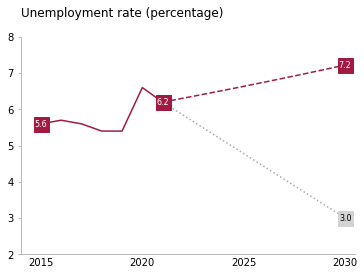

In [40]:
ax = plot_trend_and_required(df_080502,target_value = 3,sdg = 8, mul_digit = False)
ax.set_title('Unemployment rate (percentage)', loc ='left',pad = 20)
ax.set_ylim(2,8)

#### SDG 9 Industry, Innovation and Infrastructure

**9.2.1** Manufacturing Value Aded as Proportion of GDP

<span style="color:red">Need to review</span>

In [41]:
df_090201 = return_datapoints('NV_IND_MANF', plot = False)
df_090201.rename(columns = {'ISIC4_C':'value'}, inplace = True)

The year available: [2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021]
 There exists 12 data points for NV_IND_MANF.
Activity         ISIC4_C
timePeriodStart         
2010               15.73
2011               15.88
2012               15.85
2013               15.92
2014               16.11


(2015.0, 2020.0)

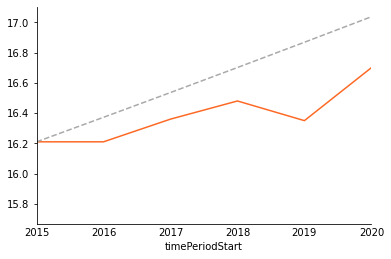

In [42]:
ax = df_090201.plot(color = SDG_col[9], legend = False)
# trend_line
val =  df_090201['value'][2015]
xs = [x for x in range(2015, 2021)]
trend_val = pd.Series([val*1.01**x for x in range(0,len(xs))])
ax.plot(xs, trend_val, linestyle = '--', color = 'darkgrey')
ax.set_xlim(2015, 2020)

The latest year of data available: 2021


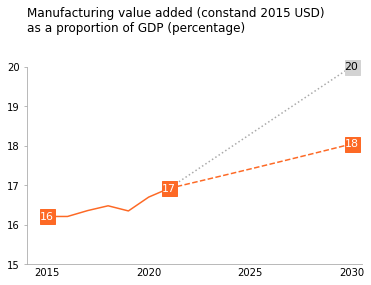

In [43]:
ax = plot_trend_and_required(df_090201, target_value = 20, sdg = 9)
ax.set_ylim(15,20.5)
ax.spines.left.set_bounds((15, 20))
ax.set_title('Manufacturing value added (constand 2015 USD)\nas a proportion of GDP (percentage)', loc = 'left',pad = 15)

**9.5.1** Research and Development Expenditure as a Proportion of GDP

<span style="color:red">Need to review</span>

In [44]:
df_090501 = return_datapoints('GB_XPD_RSDV', plot = False)

More than one disaggregative dimension available: []
The year available: [2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
 There exists 11 data points for GB_XPD_RSDV.
                   value Reporting Type
timePeriodStart                        
2010             1.61006              G
2011             1.62627              G
2012             1.63560              G
2013             1.65908              G
2014             1.67789              G


(2015.0, 2020.0)

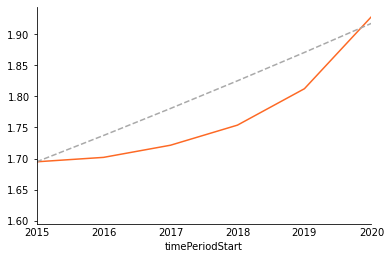

In [45]:
ax = df_090501.plot(color = SDG_col[9], legend = False)
# trend line
val = df_090501['value'][2015]
xs = [x for x in range(2015, 2021)]
ys = [val*1.025**i for i in range(0, len(xs))]

ax.plot(xs,ys, linestyle = '--',color = 'darkgrey')
ax.set_xlim(2015, 2020)

The latest year of data available: 2020


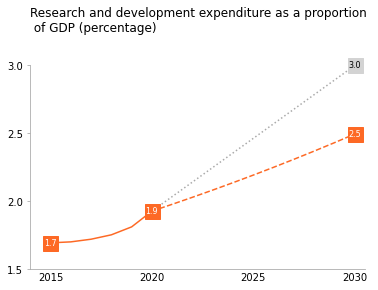

In [46]:
ax = plot_trend_and_required(df_090501,target_value = 3 , sdg = 9, mul_digit = False)
ax.set_title('Research and development expenditure as a proportion \n of GDP (percentage)', loc = 'left',pad = 20)
ax.spines.left.set_bounds(1.5,3)
ax.set_ylim(1.5,3.1)
ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))

**9.c.1** Proportion of Population Covered by a Mobile Network

<span style="color:red">Need to review</span>

More than one disaggregative dimension available: []
The year available: [2014 2015 2016 2017 2018 2019 2020]
 There exists 7 data points for IT_MOB_3GNTWK.
                    value Reporting Type
timePeriodStart                         
2014             63.13026              G
2015             78.68142              G
2016             84.86091              G
2017             88.31653              G
2018             91.21628              G


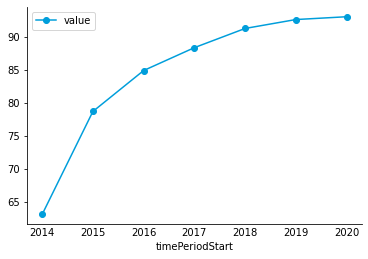

In [47]:
df_090c01 = return_datapoints('IT_MOB_3GNTWK')

The latest year of data available: 2020


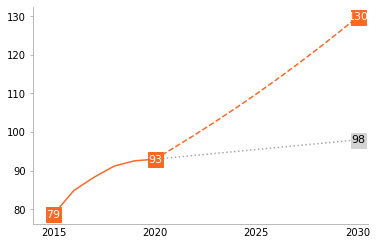

In [48]:
ax = plot_trend_and_required(df_090c01, target_value = 98,sdg = 9)

#### SDG 10 Reduced Inequality

**10.4.2** Gini Coefficient

<span style="color:red">Need to review</span>

In [49]:
df_100402 = return_datapoints('SI_DST_FISP')

No datapoint was retrieved for the geoArea for this series: SI_DST_FISP.
Run the following code to get the regions with available data:
available_count = requests.get('https://unstats.un.org/sdgs/UNSDGAPIV5/v1/sdg/Series/SI_DST_FISP/GeoAreas').json() 

            print(available_count)


In [50]:
requests.get('https://unstats.un.org/sdgs/UNSDGAPIV5/v1/sdg/Series/SI_DST_FISP/GeoAreas').json() 

[{'geoAreaCode': '104', 'geoAreaName': 'Myanmar'},
 {'geoAreaCode': '124', 'geoAreaName': 'Canada'},
 {'geoAreaCode': '156', 'geoAreaName': 'China'},
 {'geoAreaCode': '170', 'geoAreaName': 'Colombia'},
 {'geoAreaCode': '208', 'geoAreaName': 'Denmark'},
 {'geoAreaCode': '152', 'geoAreaName': 'Chile'},
 {'geoAreaCode': '203', 'geoAreaName': 'Czechia'},
 {'geoAreaCode': '174', 'geoAreaName': 'Comoros'},
 {'geoAreaCode': '214', 'geoAreaName': 'Dominican Republic'},
 {'geoAreaCode': '246', 'geoAreaName': 'Finland'},
 {'geoAreaCode': '300', 'geoAreaName': 'Greece'},
 {'geoAreaCode': '270', 'geoAreaName': 'Gambia'},
 {'geoAreaCode': '352', 'geoAreaName': 'Iceland'},
 {'geoAreaCode': '360', 'geoAreaName': 'Indonesia'},
 {'geoAreaCode': '392', 'geoAreaName': 'Japan'},
 {'geoAreaCode': '372', 'geoAreaName': 'Ireland'},
 {'geoAreaCode': '428', 'geoAreaName': 'Latvia'},
 {'geoAreaCode': '376', 'geoAreaName': 'Israel'},
 {'geoAreaCode': '496', 'geoAreaName': 'Mongolia'},
 {'geoAreaCode': '380', 'ge

**10.7.2** Proportion of countries with migration policies to facilitate orderly, safe, regular and responsible migration and mobility of people, by policy domain (%)

The year available: [2019 2021]
 There exists 2 data points for SG_CPA_MIGRP.
Policy Domains   ALLDOMAINS  DOMAIN1   DOMAIN2   DOMAIN3   DOMAIN4   DOMAIN5  \
timePeriodStart                                                                
2019               54.10000  55.0000  67.60000  79.30000  58.60000  62.20000   
2021               62.31884  61.5942  73.18841  77.53623  63.04348  68.11594   

Policy Domains    DOMAIN6  
timePeriodStart            
2019             77.50000  
2021             80.43478  


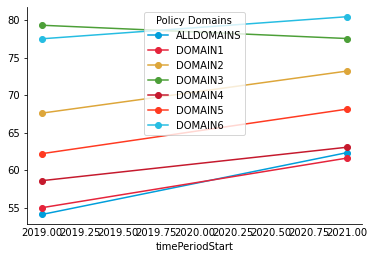

In [51]:
df_100702 = return_datapoints('SG_CPA_MIGRP')

The year available: [2010 2015 2016 2017 2018 2019 2020]
 There exists 7 data points for TM_TRF_ZERO.
Type of product       AGR       ALP       ARM       CLO       IND       OIL  \
timePeriodStart                                                               
2010             43.88866  44.61772  44.96386  31.20776  46.12834  76.15112   
2015             47.76753  50.50223  45.76861  36.54185  52.31954  79.97481   
2016             49.03004  48.43139  44.31352  32.65001  50.46325  80.13029   
2017             51.54110  53.45238  52.72472  41.73089  55.02445  86.90344   
2018             52.17857  54.36070  53.36493  42.99142  55.95402  87.97753   

Type of product       TEX  
timePeriodStart            
2010             38.97624  
2015             45.42298  
2016             41.75575  
2017             49.16732  
2018             49.90859  


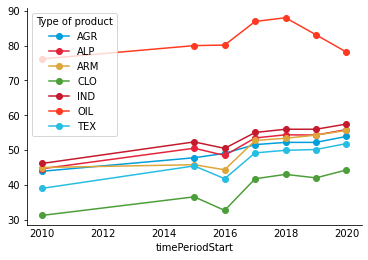

In [52]:
df_100a01 = return_datapoints('TM_TRF_ZERO')

#### SDG 11 Sustainable Cities and Communities

**11.1.1** Proportion of Urban Population Living in Slums

In [53]:
df_110101 = return_datapoints('EN_LND_SLUM', plot = False)
df_110101.rename(columns = {'URBAN':'value'}, inplace = True)

The year available: [2010 2012 2014 2016 2018 2020]
 There exists 6 data points for EN_LND_SLUM.
Location            URBAN
timePeriodStart          
2010             27.27532
2012             26.25417
2014             25.42202
2016             24.61492
2018             24.36166


The latest year of data available: 2020
Data point for 2015 is estimated by interpolation: 25.01847


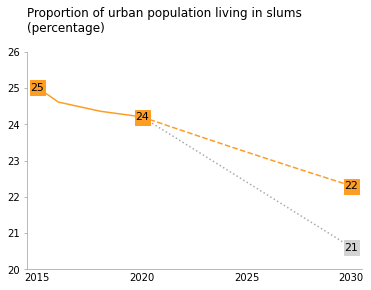

In [54]:
ax = plot_trend_and_required(df_110101,base_year= 2014, carg_r = - 0.01, sdg = 11)
ax.set_xlim(2014.5,2030.5)
ax.set_ylim(20,26)
ax.set_title('Proportion of urban population living in slums \n(percentage)', loc = 'left',pad = 20)

#### SDG 12 Sustainable Consumption and Production

**12.2.2** Domestic Material Consumption per Unit of GDP

<span style="color:red">Need to review</span>

The year available: [2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]
 There exists 10 data points for EN_MAT_DOMCMPG.
Type of product      ALP      BIM      COL      CPR      CRO      FEO  \
timePeriodStart                                                         
2010             1.22079  0.33868  0.10741  0.09357  0.11863  0.03867   
2011             1.25737  0.34054  0.11297  0.09605  0.12128  0.04410   
2012             1.26421  0.33344  0.11145  0.09411  0.11886  0.04271   
2013             1.27031  0.33596  0.10774  0.09750  0.12095  0.04340   
2014             1.25322  0.33105  0.10357  0.09660  0.11981  0.04651   

Type of product      FOF      GAS      GBO      MEO      NFO      NMA  \
timePeriodStart                                                         
2010             0.21132  0.03471  0.09298  0.11568  0.07735  0.02225   
2011             0.21531  0.03485  0.09002  0.12090  0.07775  0.02496   
2012             0.21304  0.03443  0.08820  0.12169  0.07944  0.02468   
20

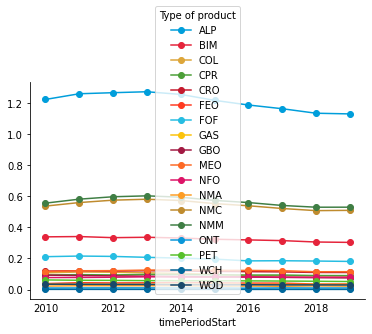

In [55]:
df_120202 = return_datapoints('EN_MAT_DOMCMPG')

The latest year of data available: 2019


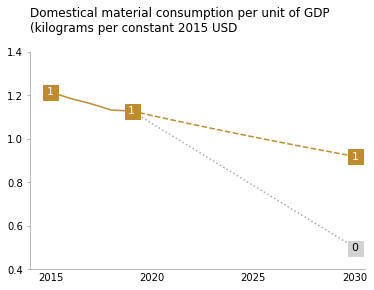

In [56]:
df_120202_alp = pd.DataFrame(df_120202.loc[:,'ALP']).rename(columns = {'ALP':'value'})
ax= plot_trend_and_required(df_120202_alp, target_value = 0.5, sdg = 12)
ax.set_title('Domestical material consumption per unit of GDP \n(kilograms per constant 2015 USD', loc = 'left', pad= 20)
ax.set_ylim(0.4,1.4)

**12.c.1** Amount of Fossil-Fuel Subsidies per unit of GDP

In [57]:
df_120c01 = return_datapoints('ER_FFS_CMPT_GDP', plot = False)
df_120c01['value'] = df_120c01['value']*100

More than one disaggregative dimension available: []
The year available: [2015 2016 2017 2018 2019 2020]
 There exists 6 data points for ER_FFS_CMPT_GDP.
                   value Reporting Type
timePeriodStart                        
2015             0.72245              G
2016             0.61934              G
2017             0.65175              G
2018             0.79605              G
2019             0.62356              G


The latest year of data available: 2020


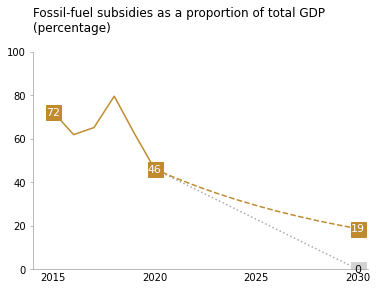

In [58]:
ax =plot_trend_and_required(df_120c01, target_value = 0.001, sdg = 12)
ax.set_ylim(0,100)
ax.spines.left.set_bounds(0,100)
ax.set_title('Fossil-fuel subsidies as a proportion of total GDP \n(percentage)',loc ='left',pad= 20)

#### SDG 13 Climate Action

**13.2.2** Total Greenhouse Gas Emissions per Year

<span style="color:red">Need to review</span>

No data is available for the Series code **EN_ATM_GHGT_AIP**.
Alternative source from [World Meteorological Oranization](https://library.wmo.int/index.php?lvl=notice_display&id=21620#.XvK7CpMza3J) used.

#### SDG 14 Life Under Water

**14.4.1** Proportion of Fish Stocks within Biologically Sustainable Levels

In [59]:
df_140401 = return_datapoints('ER_H2O_FWTL', plot= False)

More than one disaggregative dimension available: []
The year available: [2011 2013 2015 2017]
 There exists 4 data points for ER_H2O_FWTL.
                 value Reporting Type
timePeriodStart                      
2011             71.08              G
2013             68.00              G
2015             66.67              G
2017             65.85              G


The latest year of data available: 2017


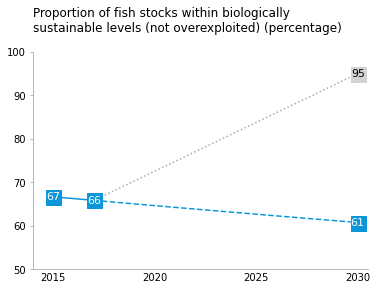

In [60]:
ax =plot_trend_and_required(df_140401,target_value = 95, sdg= 14)
ax.set_title('Proportion of fish stocks within biologically \nsustainable levels (not overexploited) (percentage)', loc= 'left',pad = 20)
ax.set_ylim(50, 100)

**14.5.1** Proportion of marine KBAs Covered by Protected Areas

In [12]:
df_140501 = return_datapoints('ER_MRN_MPA', plot = False)

More than one disaggregative dimension available: []
The year available: [2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021]
 There exists 12 data points for ER_MRN_MPA.
                    value Reporting Type
timePeriodStart                         
2010             38.65753              G
2011             39.23696              G
2012             39.97949              G
2013             41.19066              G
2014             42.45998              G


The latest year of data available: 2021


(40.0, 100.0)

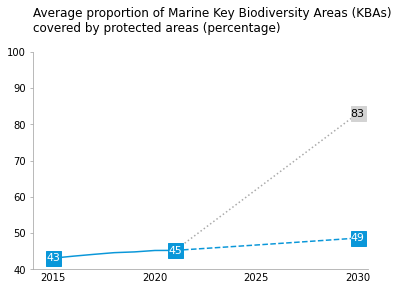

In [14]:
ax = plot_trend_and_required(df_140501, target_value = 83, sdg= 14)
ax.set_title('Average proportion of Marine Key Biodiversity Areas (KBAs) \ncovered by protected areas (percentage)', loc = 'left', pad = 20)
ax.set_ylim(40, 100)

#### SDG 15 Life on Land

**15.1.2** Proportion of Important Sites for Terrestrial Biodiversity that are Covered

In [64]:
df_150102 = return_datapoints('ER_PTD_TERR', plot = False)

More than one disaggregative dimension available: []
The year available: [2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021]
 There exists 12 data points for ER_PTD_TERR.
                    value Reporting Type
timePeriodStart                         
2010             39.48215              G
2011             39.99480              G
2012             40.54829              G
2013             41.24779              G
2014             41.75556              G


The latest year of data available: 2021


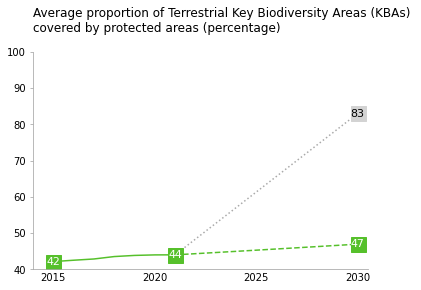

In [65]:
ax = plot_trend_and_required(df_150102,target_value= 83, sdg = 15)
ax.set_ylim(40, 100)
ax.set_title('Average proportion of Terrestrial Key Biodiversity Areas (KBAs) \ncovered by protected areas (percentage)', loc ='left', pad=20)

**15.4.1** Proportion of Important Sites for Mountain Biodiversity that are Covered

In [66]:
df_150401 = return_datapoints('ER_PTD_MTN', plot = False)

More than one disaggregative dimension available: []
The year available: [2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021]
 There exists 12 data points for ER_PTD_MTN.
                    value Reporting Type
timePeriodStart                         
2010             35.89740              G
2011             36.46197              G
2012             37.15958              G
2013             37.73640              G
2014             38.09491              G


The latest year of data available: 2021


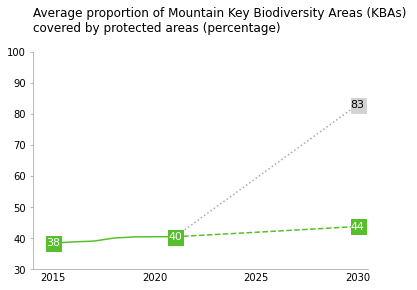

In [67]:
ax = plot_trend_and_required(df_150401,sdg = 15, target_value = 83 )
ax.set_title('Average proportion of Mountain Key Biodiversity Areas (KBAs) \ncovered by protected areas (percentage)', loc='left',pad = 20)
ax.set_ylim(30,100)


**15.5.1** Red List Index

In [17]:
df_150501 = return_datapoints('ER_RSK_LST', plot = False)

More than one disaggregative dimension available: []
The year available: [2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022]
 There exists 13 data points for ER_RSK_LST.
                   value Reporting Type
timePeriodStart                        
2010             0.76493              G
2011             0.76152              G
2012             0.75803              G
2013             0.75388              G
2014             0.75050              G


The latest year of data available: 2022


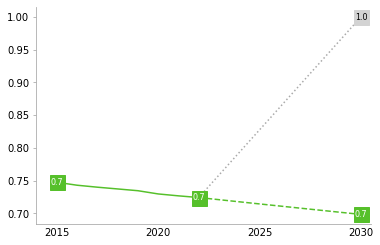

In [19]:

ax = plot_trend_and_required(df_150501,sdg = 15, target_value = 1 ,mul_digit=False)


#### SDG 16 Peace, Justice and Strong Institution

**16.1.1** Number of Victims of Intentional Homicide per 100,000 Population

In [15]:
df_160101 = return_datapoints('VC_IHR_PSRC',disagg = False, plot = False)

The year available: [2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
 There exists 11 data points for VC_IHR_PSRC.
                 value  Sex Reporting Type
timePeriodStart                           
2010               6.0  All              G
2011               6.1  All              G
2012               6.1  All              G
2013               6.0  All              G
2014               6.0  All              G


The latest year of data available: 2020


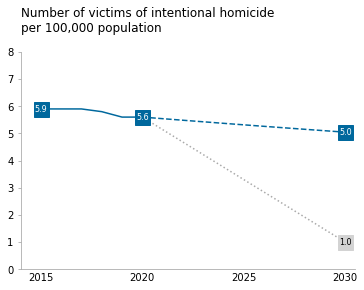

In [71]:
ax = plot_trend_and_required(df_160101,target_value=1, sdg = 16, mul_digit = False)
ax.set_title('Number of victims of intentional homicide \nper 100,000 population',loc = 'left',pad = 20)
ax.set_ylim(0,8)

**16.3.2** Unsentenced Detainees as a Proportion of Overall Prison Population

<span style="color:red">Need to review</span>

The progress analysis result is inconsistent with the 2022 release.

In [72]:
df_160302 = return_datapoints('VC_PRS_UNSNT', plot = False)
df_160302.rename(columns = {'All':'value'}, inplace = True)

The year available: [2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
 There exists 11 data points for VC_PRS_UNSNT.
Sex                   All
timePeriodStart          
2010             28.40314
2011             28.28482
2012             28.71317
2013             28.96639
2014             29.65196


The latest year of data available: 2020


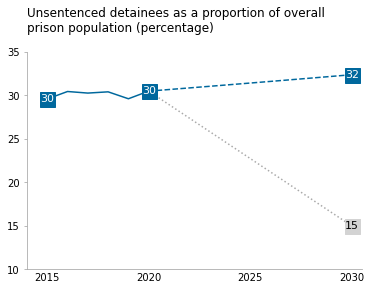

In [73]:
ax = plot_trend_and_required(df_160302, target_value = 15, sdg = 16)
ax.set_title('Unsentenced detainees as a proportion of overall\nprison population (percentage)', loc ='left',pad= 20)
ax.set_ylim(10,35)

**16.a.1** Existence of Independent National Human Rights Institutions in Complian with the Paris Principles

In [74]:
df_160a01 = return_datapoints('SG_NHR_IMPL', plot = False)

More than one disaggregative dimension available: []
The year available: [2010 2015 2016 2017 2018 2019 2020 2021]
 There exists 8 data points for SG_NHR_IMPL.
                    value Reporting Type
timePeriodStart                         
2010             32.90000              G
2015             35.50000              G
2016             36.50000              G
2017             38.10000              G
2018             39.08629              G


The latest year of data available: 2021


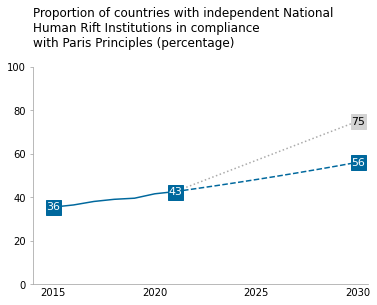

In [75]:
ax = plot_trend_and_required(df_160a01,target_value= 75, sdg = 16)
ax.set_title('Proportion of countries with independent National \nHuman Rift Institutions in compliance\nwith Paris Principles (percentage)',loc = 'left',pad = 20)
ax.set_ylim(0,100)

#### SDG 17 Partnership for the Goals

**17.2.1** Net ODA, Total to LDCs, as a proportion of OECD DAC donor's GNI

<span style="color:red">Need to review</span>

In [76]:
df_170201 = return_datapoints('DC_ODA_LDCG')

No datapoint was retrieved for the geoArea for this series: DC_ODA_LDCG.
Run the following code to get the regions with available data:
available_count = requests.get('https://unstats.un.org/sdgs/UNSDGAPIV5/v1/sdg/Series/DC_ODA_LDCG/GeoAreas').json() 

            print(available_count)


In [77]:
available_count = requests.get('https://unstats.un.org/sdgs/UNSDGAPIV5/v1/sdg/Series/DC_ODA_LDCG/GeoAreas').json() 

print(available_count)

[{'geoAreaCode': '250', 'geoAreaName': 'France'}, {'geoAreaCode': '348', 'geoAreaName': 'Hungary'}, {'geoAreaCode': '40', 'geoAreaName': 'Austria'}, {'geoAreaCode': '554', 'geoAreaName': 'New Zealand'}, {'geoAreaCode': '840', 'geoAreaName': 'United States of America'}, {'geoAreaCode': '276', 'geoAreaName': 'Germany'}, {'geoAreaCode': '124', 'geoAreaName': 'Canada'}, {'geoAreaCode': '36', 'geoAreaName': 'Australia'}, {'geoAreaCode': '208', 'geoAreaName': 'Denmark'}, {'geoAreaCode': '442', 'geoAreaName': 'Luxembourg'}, {'geoAreaCode': '246', 'geoAreaName': 'Finland'}, {'geoAreaCode': '372', 'geoAreaName': 'Ireland'}, {'geoAreaCode': '380', 'geoAreaName': 'Italy'}, {'geoAreaCode': '578', 'geoAreaName': 'Norway'}, {'geoAreaCode': '593', 'geoAreaName': 'Development Assistance Committee members (DAC)'}, {'geoAreaCode': '620', 'geoAreaName': 'Portugal'}, {'geoAreaCode': '724', 'geoAreaName': 'Spain'}, {'geoAreaCode': '203', 'geoAreaName': 'Czechia'}, {'geoAreaCode': '300', 'geoAreaName': 'Gre

**17.8.1** Proportion of Individuals Using the Internet

<span style="color:red">Need to review</span>

In [78]:
df_170801 = return_datapoints('IT_USE_ii99', plot = False)

More than one disaggregative dimension available: []
The year available: [2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
 There exists 11 data points for IT_USE_ii99.
                 value Reporting Type
timePeriodStart                      
2010              28.9              G
2011              31.3              G
2012              34.0              G
2013              36.0              G
2014              38.1              G


The latest year of data available: 2020


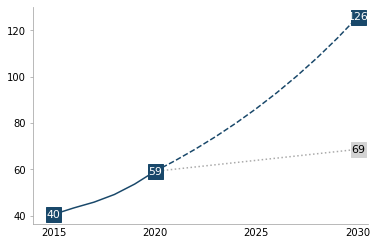

In [79]:
ax = plot_trend_and_required(df_170801, carg_r = 0.01, sdg = 17)

**17.8.3** Number of Countries with national Statistical Plan that is Fully Funded and Under Implementation

In [80]:
df_170803 = return_seriesCode('17.8.3')

Invalid indicator code


#### Miscellaneous

A progress bar line to show the expected level by 2030 based on the thresholds.

The latest year of data available: 2021


<ipython-input-7-aa227d32a3d5>:14: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('020102.jpg', dpi = 150, bbox_to_inches = 'tight')


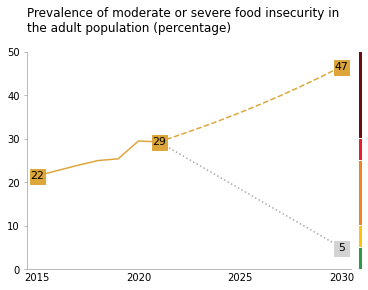

In [7]:
ax = plot_trend_and_required(df = df_020102, base_year = 2015,target_value = 5 ,sdg =2)
ax.set_ylim(0,50)
ax.set_xlim(2014.5, 2031)
ax.spines.bottom.set_bounds(2014.5, 2030.5)
ax.set_title('Prevalence of moderate or severe food insecurity in \nthe adult population (percentage)', loc = 'left', pad = 20)

# progress symbol
width = 0.30
ax.bar(2031,4.9, width = width, color = '#2c9a46') #green
ax.bar(2031,4.8, width = width, bottom = 5.1, color = '#ffc10c') #yellow
ax.bar(2031,14.8, width = width, bottom = 10.1, color = '#f58222') #orange
ax.bar(2031,4.8, width = width, bottom = 25.1 , color = '#ea1d2c') #red
ax.bar(2031,19.9, width = width, bottom = 30.1 , color = '#700a11') # dark red
plt.savefig('020102.jpg', dpi = 150, bbox_to_inches = 'tight')